# Problem Set 1
Due April 11th at 5:30pm -- at the start of the class so we can
discuss the solutions in class.

### Before You Start

Make sure to at least take a basic tutorial in the IPython notebook,
otherwise you'll be totally lost.  For this problem set, you should
download flights.csv.bz2 and weather.csv.bz2 datasets from
Canvas (files-data).   Rename the notebook to
LASTNAME_FIRSTNAME-PS1.ipynb.

When done, please submit
1. the notebook itself
2. the rendered html or pdf of it.



## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.


## Preliminaries

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.2.1 (need at least 1.0)
Numpy version:        1.14.0 (need at least 1.7.1)
SciPy version:         1.0.0 (need at least 0.12.0)
Pandas version:       0.22.0 (need at least 0.11.0)
Mapltolib version:     2.1.2 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


In [2]:
## Let's read the data and print some summary information
## adjust the path for your file system!
flights_df= pd.read_csv("../Problem_Set_1/flights.csv.bz2")
print(flights_df)

        Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
0                1  2013      1    1     517.0        2.0     830.0   
1                2  2013      1    1     533.0        4.0     850.0   
2                3  2013      1    1     542.0        2.0     923.0   
3                4  2013      1    1     544.0       -1.0    1004.0   
4                5  2013      1    1     554.0       -6.0     812.0   
5                6  2013      1    1     554.0       -4.0     740.0   
6                7  2013      1    1     555.0       -5.0     913.0   
7                8  2013      1    1     557.0       -3.0     709.0   
8                9  2013      1    1     557.0       -3.0     838.0   
9               10  2013      1    1     558.0       -2.0     753.0   
10              11  2013      1    1     558.0       -2.0     849.0   
11              12  2013      1    1     558.0       -2.0     853.0   
12              13  2013      1    1     558.0       -2.0     924.0   
13    

In [3]:
print (flights_df.shape)

(336776, 17)


In [4]:
print (flights_df.columns)

Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')


In [5]:
print (flights_df.dtypes)

Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [6]:
unique_dest = flights_df.dest.unique()
print(unique_dest)

flights_df.head(10)

['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [7]:
# Your code here
### followed https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/ to do the problem set

len(flights_df.groupby(['dest']).groups['SEA'])

3923

__Answer:__ In the year of 2013, 3923 flights were from NYC airports to Seattle. 

(b) How many airlines fly from NYC to Seattle?

In [8]:
# Your code here
flights_to_SEA = flights_df[flights_df.dest == 'SEA']
airlines_to_SEA = flights_to_SEA.carrier.unique()
print(airlines_to_SEA)

['AS' 'DL' 'UA' 'B6' 'AA']


__Answer:__ 5 Airlines fly from NYC airports to Seattle. 

(c) How many unique air planes fly from NYC to Seattle?

In [9]:
# Your code here
unique_planes_to_SEA = flights_to_SEA.tailnum.nunique()
print(unique_planes_to_SEA)

935


__Answer:__ 935 unique airplanes fly from NYC to Seattle.

(d) What is the average arrival delay for flights from NYC to Seattle?

In [10]:
# Your code here
flights_to_SEA.arr_delay.mean()

-1.0990990990990992

__Answer:__ The average delay for flights from NYC to Seattle is -1.099.

(e) What proportion of flights to Seattle come from each NYC airport?

In [11]:
# Your code here
# NYC airports that have flights to SEA
NYC_airport_origin = flights_to_SEA.origin.unique()
print('NYC_airport_origin', NYC_airport_origin)   # NOTE: only EWR and JFK have flights from NYC to SEA

# total number of flights from NYC to SEA
total_NYC_to_SEA = len(flights_to_SEA)
print('NYC_to_SEA: ', total_NYC_to_SEA)

# total number of flights from EWR to SEA
EWR_to_SEA = len(flights_to_SEA.groupby(['origin']).groups['EWR'])
proportion_EWR = EWR_to_SEA/total_NYC_to_SEA
print('EWR_to_SEA: ', EWR_to_SEA, 'proportion_EWR: ', round(proportion_EWR*100,2), '%')

# total number of flights from JFK to SEA
JFK_to_SEA = len(flights_to_SEA.groupby(['origin']).groups['JFK'])
proportion_JFK = JFK_to_SEA/total_NYC_to_SEA
print('JFK_to_SEA: ', JFK_to_SEA, 'proportion_JFK: ', round(proportion_JFK*100,2), '%')


NYC_airport_origin ['EWR' 'JFK']
NYC_to_SEA:  3923
EWR_to_SEA:  1831 proportion_EWR:  46.67 %
JFK_to_SEA:  2092 proportion_JFK:  53.33 %


__Answer: __Only EWR and JFK have flights from NYC to SEA. 
            46.67% of the flights from NYC to SEA comes from EWR 
            53.33% of the flights from NYC to SEA comes from JFK

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [12]:
# Your code here
# group dep_delay that have positive numbers by date
departure_delay = flights_df[flights_df['dep_delay'] > 0]
avg_dep_delay = departure_delay.groupby(['year', 'month', 'day']).mean()
avg_dep_delay

# find the max of dep_delay
dep_delay_max = avg_dep_delay[avg_dep_delay['dep_delay']==avg_dep_delay['dep_delay'].max()]
dep_delay_max


,,,Unnamed: 0,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
year,month,day,,,,,,,,,,
2013,3,8,143213.777948,1502.488515,102.903522,1541.917305,101.607963,1687.222052,150.228178,1081.352221,14.738132,28.675345


__Answer: __ March 8th 2013 has the longest departure delay of 102.90 

In [13]:
# group arr_delay that have positive numbers by date
arrival_delay = flights_df[flights_df['arr_delay'] > 0]
avg_arr_delay = arrival_delay.groupby(['year', 'month', 'day']).mean()
avg_arr_delay

# find the max of arr_delay
# learned the df.loc way from http://www.datasciencemadesimple.com/select-row-maximum-minimum-value-python-pandas/
arr_delay_max = avg_arr_delay.loc[avg_arr_delay['arr_delay'].idxmax()]
arr_delay_max

Unnamed: 0    259200.202783
dep_time        1534.888668
dep_delay         87.783300
arr_time        1344.916501
arr_delay        110.093439
flight          1788.904573
air_time         161.254473
distance        1142.854871
hour              15.049702
minute            29.918489
Name: (2013, 7, 10), dtype: float64

__Answer:__ July 10th 2013 has the longest departure delay of 110.09.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [14]:
# Your code here
# group departure delay by date
overall_dep_delay = departure_delay.groupby(['year','month','day']).count()
#find the max of total daily delay #
worst_day_dep_delay = overall_dep_delay.loc[overall_dep_delay['dep_delay'].idxmax()]
worst_day_dep_delay

Unnamed: 0    674
dep_time      674
dep_delay     674
arr_time      674
arr_delay     673
carrier       674
tailnum       674
flight        674
origin        674
dest          674
air_time      673
distance      674
hour          674
minute        674
Name: (2013, 12, 23), dtype: int64

In [15]:
# Your code here
# group arrival delay by date
overall_arr_delay = arrival_delay.groupby(['year','month','day']).count()
#find the max of total daily delay #
worst_day_arr_delay = overall_arr_delay.loc[overall_arr_delay['arr_delay'].idxmax()]
worst_day_arr_delay

Unnamed: 0    780
dep_time      780
dep_delay     780
arr_time      780
arr_delay     780
carrier       780
tailnum       780
flight        780
origin        780
dest          780
air_time      780
distance      780
hour          780
minute        780
Name: (2013, 12, 17), dtype: int64

__Answer:__ December 23rd, 2013 has the worst day of departure delay. December 17th, 2013 has the worst day of arrival delay. If someone dislike delayed flights then the person should try to avoid December and July as in 2013, July 10th has the longest time of delay and December 23rd has the largest total number of delayed cases. 

(c) Are there any seasonal patterns in departure delays for flights from NYC?

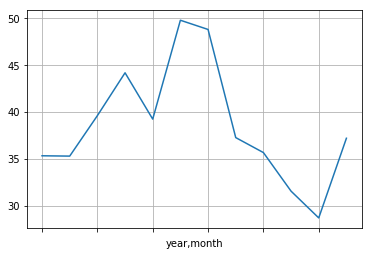

In [16]:
# Your code here
# group departure delay by month
monthly_dep_delay = departure_delay.groupby(['year','month']).mean()
#plot the departure delay by month
monthly_dep_delay.dep_delay.plot()
matplotlib.pyplot.grid()

__Answer:__ As can be observed from the plot, June and July experienced the worst average delay during the year. This could because that summer is a busy traveling season and more flights are arranged and therefore the delay rate is higher.

(d) On average, how do departure delays vary over the course of a day?

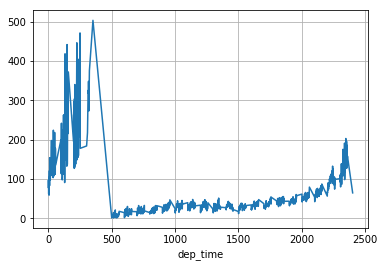

In [17]:
# Your code here
# group departure delay by dep_time
daily_dep_delay = departure_delay.groupby(['dep_time']).mean()
#plot the daily departure delay
daily_dep_delay.dep_delay.plot()
matplotlib.pyplot.grid()

__Answer:__ As can be observed from the plot, the delay is pretty common and frequently seen for red eye flights (with the time frame from 22:00 - 4:00). The delay improves from 5:00 in the morning and is pretty low throughout the day.

## Question 3
   Which flight departing NYC in 2013 flew the fastest?

In [18]:
# Your code here
# Calculating the speed for the flights
flights_df['speed'] = flights_df['distance']/(flights_df['air_time'])
# Getting the max speed
flights_df.loc[flights_df['speed'].idxmax()]

Unnamed: 0     216448
year             2013
month               5
day                25
dep_time         1709
dep_delay           9
arr_time         1923
arr_delay         -14
carrier            DL
tailnum        N666DN
flight           1499
origin            LGA
dest              ATL
air_time           65
distance          762
hour               17
minute              9
speed         11.7231
Name: 216447, dtype: object

__Answer:__
On May 25th, 2013, the DL 1499 from LGA to ATL flew the fastest with a speed of 11.72.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [19]:
# Your code here
# Create carrier+flight+dest column
flights_df['carrier_flight_dest'] = flights_df.carrier + flights_df.flight.astype(str) + "  "\
                                + flights_df.dest

# count the total number of flights for flights_by_date   
total = pd.DataFrame(flights_df.groupby('carrier_flight_dest').count())
total.reset_index(level=0, inplace=True)
print(total.head())

# flights that happen 365 days 
flights_365 = total[total['year']==365]['carrier_flight_dest']
print(flights_365)


  carrier_flight_dest  Unnamed: 0  year  month  day  dep_time  dep_delay  \
0         9E2900  BNA          59    59     59   59        59         59   
1         9E2901  BOS          55    55     55   55        55         55   
2         9E2902  BOS          55    55     55   55        53         53   
3         9E2903  BOS          29    29     29   29        29         29   
4         9E2903  CLT          27    27     27   27        26         26   

   arr_time  arr_delay  carrier  tailnum  flight  origin  dest  air_time  \
0        59         59       59       59      59      59    59        59   
1        55         55       55       55      55      55    55        55   
2        53         53       55       53      55      55    55        53   
3        27         27       29       29      29      29    29        27   
4        26         26       27       26      27      27    27        26   

   distance  hour  minute  speed  
0        59    59      59     59  
1        55    5

__Answer: __
<br> __Flights that fly 365 days:__
<br> AA119  LAX Los Angeles 

AA1357  SJU San Juan, Puerto Rico

AA1611  MIA Miami

AA181  LAX Los Angeles

AA59  SFO San Francisco

B61783  MCO Orlando

B6219  CLT Charlotte

B6359  BUR Burbank

B6371  FLL Fort Lauderdale

B6431  SRQ Sarasota

B6703  SJU San Juan, Puerto Rico

DL2159  MCO Orlando

DL2391  TPA Tampa

EV5712  IAD Dulles

UA15  HNL Honolulu

VX251  LAS Las Vegas

VX407  LAX Los Angeles

VX413  LAX Los Angeles

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


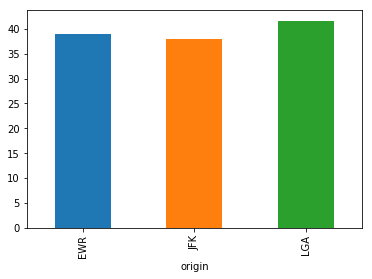

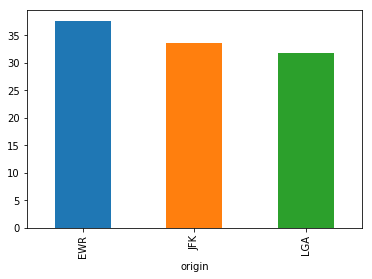

In [20]:
# Your code here
import matplotlib.pyplot as plt
# Research Question: which airport has the worst delay?
# each airport's average departure delay time
dep_delay_airport = departure_delay.groupby('origin')\
.mean()['dep_delay']
dep_delay_airport.plot.bar()
plt.show()


# each airport's average arrival delay time
arr_delay_airport = arrival_delay.groupby('origin')\
.mean()['dep_delay']
arr_delay_airport.plot.bar()
plt.show()

__Answer: __ As can be seen from the graph, for the average depature delay: LGA > EWR > JFK. EWR and JFK have a relatively close average departure delay but LGA has a slightly higher avg delay among the three. For the average arrival delay: EWR > JFK > LGA. EWR clearly has the largest number of arrival delay and LGA has the smallest. Passengers from NYC should try to pick LGA as their arrival airport and JFK as their departure airport so that they can get a better chance of on-time for their flights. 

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [21]:
# Your code here
# import the weather data
weather_df = pd.read_csv('../Problem_Set_1/weather.csv.bz2')
weather_df.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


In [22]:
# remove the unnamed:0 column for flights datasets
flights_new = flights_df.iloc[:,1:]
flights_new.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,speed,carrier_flight_dest
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,6.167401,UA1545 IAH
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,6.237885,UA1714 IAH
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,6.806250,AA1141 MIA
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,8.612022,B6725 BQN
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,6.568966,DL461 ATL


In [23]:
# remove the unnamed:0 column for weather datasets
weather_new = weather_df.iloc[:,1:]
weather_new.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


In [24]:
# leave the useful columns only for analysis
flights_cleaned = pd.DataFrame(flights_df[['origin','year','month','day','dep_delay']])
flights_cleaned.head()

,origin,year,month,day,dep_delay
0,EWR,2013,1,1,2.0
1,LGA,2013,1,1,4.0
2,JFK,2013,1,1,2.0
3,JFK,2013,1,1,-1.0
4,LGA,2013,1,1,-6.0


In [25]:
# Merge two datasets
flights_weather = pd.merge(weather_new,flights_cleaned, on = ['year','month','day','origin'], how = 'inner')
# get mean for the flights_weather dataset and group by date
flights_weather = flights_weather.groupby(['year','month','day','origin']).mean()
flights_weather

hour       temp       dewp      humid  \
year month day  origin                                               
2013 1.0   1.0  EWR     11.782609  38.480000  25.050435  58.386087   
           2.0  EWR     11.500000  28.835000  11.382500  47.786250   
           3.0  EWR     11.500000  29.457500  14.780000  54.395833   
           4.0  EWR     11.500000  33.477500  19.205000  55.880417   
           5.0  EWR     11.500000  36.732500  19.242500  49.284583   
           6.0  EWR     11.500000  37.970000  26.390000  64.749167   
           7.0  EWR     11.500000  41.277500  24.567500  52.977917   
           8.0  EWR     11.500000  38.315000  26.255000  63.067500   
           9.0  EWR     11.500000  40.782500  31.775000  70.531250   
           10.0 EWR     11.500000  44.187500  26.817500  52.204167   
           11.0 EWR     11.500000  41.382500  29.990000  64.544583   
           12.0 EWR     11.500000  45.620000  44.322500  95.299167   
           13.0 EWR     11.500000  45.875000  44.480000  94.967500   
           14.0 EWR     11.500000  51.342500  45.650000  83.949583   
           15.0 EWR     11.500000  39.372500  29.435000  68.736250   
           16.0 EWR     11.500000  34.760000  31.475000  88.527500   
           17.0 EWR     11.500000  39.897500  29.487500  67.879167   
           18.0 EWR     11.500000  31.812500  13.040000  46.866250   
           19.0 EWR     11.500000  36.995000  19.122500  49.188333   
           20.0 EWR     11.500000  45.365000  24.320000  46.686250   
           21.0 EWR     11.500000  30.207500   9.912500  42.249167   
           22.0 EWR     11.500000  23.270000   3.282500  42.902500   
           23.0 EWR     11.500000  15.492500  -5.207500  39.284167   
           24.0 EWR     11.500000  17.675000  -1.307500  45.080000   
           25.0 EWR     11.500000  17.847500   1.505000  49.060833   
           26.0 EWR     11.500000  20.112500  10.025000  66.837083   
           27.0 EWR     11.500000  25.422500   8.472500  49.945417   
           28.0 EWR     11.500000  30.567500  20.120000  67.177500   
           29.0 EWR     11.500000  41.240000  37.092500  85.957500   
           30.0 EWR     11.500000  47.637500  45.005000  91.115833   
...                           ...        ...        ...        ...   
     12.0  2.0  EWR     11.500000  44.262500  30.912500  59.469167   
           3.0  EWR     11.500000  44.450000  35.037500  72.165417   
           4.0  EWR     11.500000  43.827500  36.365000  75.430000   
           5.0  EWR     11.500000  51.830000  48.537500  88.708333   
           6.0  EWR     11.500000  52.107500  49.632500  91.290000   
           7.0  EWR     11.500000  38.315000  30.125000  74.330833   
           8.0  EWR     11.500000  31.122500  16.805000  55.514167   
           9.0  EWR     11.500000  33.687500  32.442500  95.185000   
           10.0 EWR     11.500000  33.882500  31.152500  89.748750   
           11.0 EWR     11.500000  28.235000  16.647500  61.745417   
           12.0 EWR     11.500000  25.925000  10.145000  51.341667   
           13.0 EWR     11.500000  25.865000  10.460000  51.832917   
           14.0 EWR     11.500000  26.585000  19.145000  74.497083   
           15.0 EWR     11.500000  32.495000  28.850000  87.185833   
           16.0 EWR     11.500000  29.285000  14.525000  54.089583   
           17.0 EWR     11.782609  26.545217  18.844348  73.813478   
                JFK      5.000000  26.960000  10.940000  50.340000   
           18.0 EWR     11.500000  27.830000  19.497500  71.921667   
           19.0 EWR     11.500000  32.337500  21.950000  65.785833   
           20.0 EWR     11.500000  41.442500  30.597500  65.970833   
           21.0 EWR     11.500000  50.907500  43.482500  76.558333   
           22.0 EWR     11.500000  64.782500  57.402500  77.243750   
           23.0 EWR     11.500000  58.895000  55.752500  89.546667   
           24.0 EWR     11.500000  38.870000  24.245000  56.234167   
           25.0 EWR     11.500000  25.4

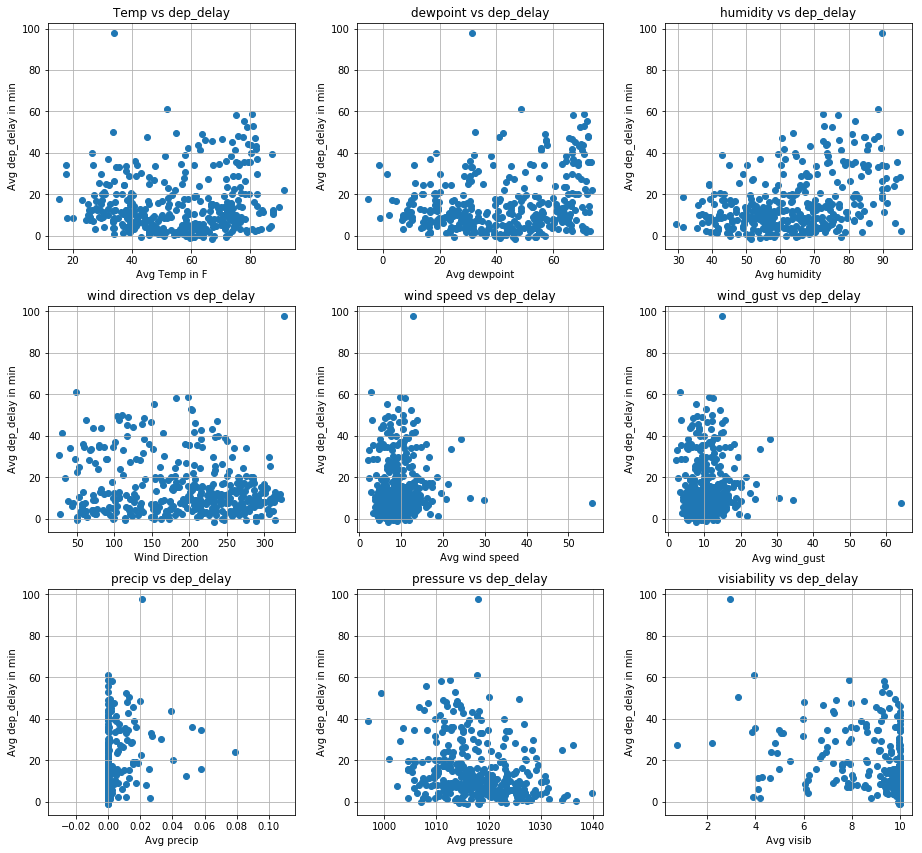

In [26]:
# plot the variables from weather with the flights.dep_delay to see the relationship
plt.figure(1)

# Temp vs dep_delay
plt.subplot(331)
plt.scatter(flights_weather.temp, flights_weather.dep_delay)
plt.title('Temp vs dep_delay')
plt.xlabel('Avg Temp in F')
plt.ylabel('Avg dep_delay in min')
plt.grid(True)

# dewpoint vs dep_delay
plt.subplot(332)
plt.scatter(flights_weather.dewp, flights_weather.dep_delay)
plt.title('dewpoint vs dep_delay')
plt.xlabel('Avg dewpoint')
plt.ylabel('Avg dep_delay in min')
plt.grid(True)

# humidity vs dep_delay
plt.subplot(333)
plt.scatter(flights_weather.humid, flights_weather.dep_delay)
plt.title('humidity vs dep_delay')
plt.xlabel('Avg humidity')
plt.ylabel('Avg dep_delay in min')
plt.grid(True)

# wind direction vs dep_delay
plt.subplot(334)
plt.scatter(flights_weather.wind_dir, flights_weather.dep_delay)
plt.title('wind direction vs dep_delay')
plt.xlabel('Wind Direction')
plt.ylabel('Avg dep_delay in min')
plt.grid(True)

# wind speed vs dep_delay
plt.subplot(335)
plt.scatter(flights_weather.wind_speed, flights_weather.dep_delay)
plt.title('wind speed vs dep_delay')
plt.xlabel('Avg wind speed')
plt.ylabel('Avg dep_delay in min')
plt.grid(True)

# wind_gust vs dep_delay
plt.subplot(336)
plt.scatter(flights_weather.wind_gust, flights_weather.dep_delay)
plt.title('wind_gust vs dep_delay')
plt.xlabel('Avg wind_gust')
plt.ylabel('Avg dep_delay in min')
plt.grid(True)

# precip vs dep_delay
plt.subplot(337)
plt.scatter(flights_weather.precip, flights_weather.dep_delay)
plt.title('precip vs dep_delay')
plt.xlabel('Avg precip')
plt.ylabel('Avg dep_delay in min')
plt.grid(True)

# pressure vs dep_delay
plt.subplot(338)
plt.scatter(flights_weather.pressure, flights_weather.dep_delay)
plt.title('pressure vs dep_delay')
plt.xlabel('Avg pressure')
plt.ylabel('Avg dep_delay in min')
plt.grid(True)

# visiability vs dep_delay
plt.subplot(339)
plt.scatter(flights_weather.visib, flights_weather.dep_delay)
plt.title('visiability vs dep_delay')
plt.xlabel('Avg visib')
plt.ylabel('Avg dep_delay in min')
plt.grid(True)

plt.subplots_adjust(top=3, bottom=0.25, left=1, right=3, hspace=0.25, wspace=0.25)

As can be seen from the graph:
<br> - __temp vs dep_delay__
<br> - Temperature doesn't have a very strong impact on the delay, but slightly there is the pattern that as temperature goes up, the delay in min get slightly longer. 
<br> - __dewpoint vs dep_delay__
<br> - As the avg dewpoint gets larger, the delay in min gets slightly longer. 
<br> - __humidity vs dep_delay__
<br> - humidity and avg dep_delay has a positive correlation: as avg humidity goes up, the avg delay in minutes goes higher too
<br> - __wind direction vs dep_delay__
<br> - when the wind direction is around 200-300, the avg delay happens very frequently and usually for within 30 min
<br> - __wind speed vs dep_delay__
<br> - we can observe that the delay happens very frequently and usually lasts for 0 - 60 min when there is wind and the avg wind speed is around 0 - 20
<br> - __wind gust vs dep_delay__
<br> - same as the wind speed, the delay happens very frequently and usually lasts for 0 - 60 min when there is wind gust and the avg wind gust is around 0 - 20
<br> - __precipitation vs dep_delay__
<br> - precipitation at 0.00 -0.02 has a very strong influence in flights delay. Delays happens very frequently when there is precipitation and usually lasts from 0-60 min
<br> - __pressure vs dep_delay__
<br> - overall when the pressure is in the 1005 - 1030 range, delays happen more frequenlty and can last for 0 - 60 min
<br> - __visability vs dep_delay__
<br> - visability usually doesn't have a strong influence on departure delay until it reaches to a certain level. delays happen when the avg visability reaches to 4 and the delay instances occur a lot when the visability reaches to 10.
